#AirBnB data analysis 

In this project, we will focus on three questions.
1. Compare the list price on Boston and seattle.
2. Modeling and predict the listing price.
3. Customer experience review.

After analysis, we can give the landlord some advise.


Import the useful tools below

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from operator import eq
%matplotlib inline

Import the dataset from csv

In [2]:
sl = pd.read_csv("seattle_listings.csv")
bl=pd.read_csv("boston_listings.csv")

show all of the columns in the seattle listing and understand the dataset, we can find some columns are useless, such as id,listing_url, etc, and some columns are null, such as space.Some columns need to be clean and modify, such as price.

In [3]:
sl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

1. Price comparison

In [4]:
sl['beds'].fillna(0, inplace=True)

The 'price' columns are string, we need to convert it to float, we can use below method

In [5]:
removedollar=lambda x:x.replace('$','')
removecomma=lambda x:float(x.replace(',',''))
sl['price']=sl['price'].apply(removedollar).apply(removecomma).astype(np.float)
bprice=bl['price'].apply(removedollar).apply(removecomma).astype(np.float)
sl['price']
#sl.select_dtypes(include=['object']).columns


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
5       120.0
6        80.0
7        60.0
8        90.0
9       150.0
10       95.0
11       99.0
12      245.0
13      165.0
14      461.0
15      109.0
16       66.0
17       99.0
18      200.0
19      700.0
20      110.0
21       99.0
22      450.0
23       75.0
24      600.0
25      450.0
26      150.0
27       45.0
28      300.0
29       80.0
        ...  
3788    115.0
3789     60.0
3790    175.0
3791     85.0
3792    109.0
3793    109.0
3794    107.0
3795    200.0
3796     85.0
3797     70.0
3798     77.0
3799     65.0
3800    185.0
3801    108.0
3802    200.0
3803    250.0
3804    125.0
3805    100.0
3806    160.0
3807    109.0
3808    175.0
3809    120.0
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

The Boston have higher average price and std than Seattle. 

In [6]:
sl['price'].describe(),bprice.describe()

(count    3818.000000
 mean      127.976166
 std        90.250022
 min        20.000000
 25%        75.000000
 50%       100.000000
 75%       150.000000
 max      1000.000000
 Name: price, dtype: float64, count    3585.000000
 mean      173.925802
 std       148.331321
 min        10.000000
 25%        85.000000
 50%       150.000000
 75%       220.000000
 max      4000.000000
 Name: price, dtype: float64)

From the hist plot below, green color is seattle price and red color is  boston price .Most of the list prices are around 100 dollar in seattle and more listing price for boston are between 100-200 dollar


In [7]:
sl['price'].sum()

488613.0

In [8]:
bprice.sum()

623524.0

(0, 700)

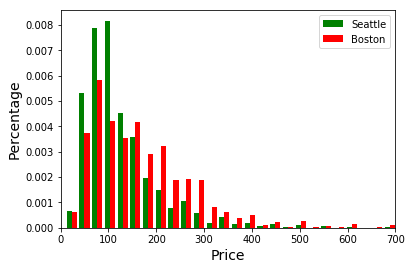

In [9]:
x=pd.concat([sl['price'],bprice],axis=1).values

colors = ['green', 'red']
plt.hist(x, 150, density=True, histtype='bar', color=colors, label=colors)
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Price',fontsize=14)
plt.legend(['Seattle','Boston'])

plt.xlim(0, 700)


2. Price modeling

In this section we fit a linear regression to AirBnB prices in the Seattle.The 'amenities' is a very useful column which includes many key features such as A/C, TV, Gym, Pool, free parking and etc. We need to separate each features as a single column.

In [10]:
rep=lambda x: x.replace('{','').replace('}','').replace('"','')
amenities=sl['amenities'].apply(rep)

In [11]:
cat_amenities=[]
each_amenities=[]
for i in amenities:
    t=i.split(',')       
    each_amenities.append(t)
    for j in t:      
        cat_amenities.append(j)
        
#cat_amenities=list(set(cat_amenities))
#del cat_amenities[0]
#cat_amenities=np.delete(cat_amenities, np.where(cat_amenities == ''))
#each_amenities=np.asarray(each_amenities)
#cat_amenities=np.asarray(cat_amenities)

cat_amenities=np.unique(cat_amenities)
cat_amenities=np.delete(cat_amenities, np.where(cat_amenities == ''))

We need to find total amenities by using above code.

In [12]:
cat_amenities

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype='<U26')

we will find amenities for each rental property.

In [52]:
each_amenities[100]

['TV',
 'Internet',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Heating',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Essentials',
 'Shampoo']

Use True and False to show each amenity

In [14]:
amenity_arr = np.array(total_amenities.map(lambda amns: amn in amns) for amn in cat_amenities)
amenity_arr

array(<generator object <genexpr> at 0x00000261B2342318>, dtype=object)

Add 3 more features, price, bed_type, beds

In [15]:
features=sl[['price','bed_type','beds']]
features.head(5)

,price,bed_type,beds
0,85.0,Real Bed,1.0
1,150.0,Real Bed,1.0
2,975.0,Real Bed,7.0
3,100.0,Real Bed,2.0
4,450.0,Real Bed,3.0


Clean up the amenities columns for each rental properties


In [48]:
sl['amenities'] = sl['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

sl['amenities'].map(lambda amns: amns.split("|"))

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
5       [Wireless Internet, Free Parking on Premises, ...
6       [Wireless Internet, Free Parking on Premises, ...
7       [Wireless Internet, Pets live on this property...
8       [TV, Cable TV, Internet, Wireless Internet, Ki...
9       [TV, Internet, Wireless Internet, Kitchen, Fre...
10      [TV, Cable TV, Internet, Wireless Internet, Ki...
11      [TV, Cable TV, Wireless Internet, Kitchen, Fre...
12      [TV, Cable TV, Internet, Wireless Internet, Ki...
13      [TV, Cable TV, Internet, Wireless Internet, Ki...
14      [TV, Cable TV, Internet, Wireless Internet, Ki...
15      [TV, Cable TV, Internet, Kitchen, Free Parking...
16      [Internet, Wireless Internet, Pets Allowed, Br...
17      [Wirel

Transfer amenities to True/False

In [17]:
amenity_arr = np.array([sl['amenities'].map(lambda amns: amn in amns) for amn in cat_amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

Combine all data to one table

In [18]:
features = pd.concat([features.drop(['price'],axis=1), pd.DataFrame(data=amenity_arr.T, columns=cat_amenities)], axis=1)

features.head(5)

,bed_type,beds,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,Real Bed,1.0,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,Real Bed,1.0,False,False,False,True,False,True,False,False,...,True,False,True,False,False,True,True,False,False,True
2,Real Bed,7.0,False,True,False,False,True,True,True,True,...,False,True,True,False,False,True,True,False,False,True
3,Real Bed,2.0,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,True,False,False,True
4,Real Bed,3.0,False,False,False,False,True,True,False,False,...,False,True,True,False,False,True,False,False,False,True


Dummy the bed_type data

In [19]:
dummy_cols_df = pd.get_dummies(features, dummy_na=True)
dummy_cols_df.head(5)


,beds,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
0,1.0,False,True,False,False,True,False,False,False,False,...,True,False,False,True,0,0,0,0,1,0
1,1.0,False,False,False,True,False,True,False,False,False,...,True,False,False,True,0,0,0,0,1,0
2,7.0,False,True,False,False,True,True,True,True,False,...,True,False,False,True,0,0,0,0,1,0
3,2.0,False,False,False,False,False,True,False,False,False,...,True,False,False,True,0,0,0,0,1,0
4,3.0,False,False,False,False,True,True,False,False,False,...,False,False,False,True,0,0,0,0,1,0


Now we get the final table with 48 columns, all the features related with listing price. 

Split the train data and test data

In [20]:
X = dummy_cols_df
#X = features[cat_amenities]
y = sl['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.414546255907281 on 1146 values.'

In [21]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

    #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_preds))
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_preds))

In [22]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
print("The RMSE on the training data was {}.  The RMSE on the test data was {}.".format(train_RMSE, test_RMSE))

The rsquared on the training data was 0.3940357638296218.  The rsquared on the test data was 0.414546255907281.
The RMSE on the training data was 69.45565045444086.  The RMSE on the test data was 70.80651012000907.


After the training, the R squared on the training data is 0.39 and on the test data is 0.41, RMSE on the training data is 69.46 and on the test data is 70.81

Find the coef weight among the features

In [32]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
46,bed_type_Real Bed,2.665056e+14,2.665056e+14
42,bed_type_Airbed,2.665056e+14,2.665056e+14
44,bed_type_Futon,2.665056e+14,2.665056e+14
45,bed_type_Pull-out Sofa,2.665056e+14,2.665056e+14
43,bed_type_Couch,2.665056e+14,2.665056e+14
9,Doorman,4.737328e+01,4.737328e+01
0,beds,4.216297e+01,4.216297e+01
21,Hot Tub,1.769218e+01,1.769218e+01
11,Elevator in Building,1.665745e+01,1.665745e+01
22,Indoor Fireplace,1.348221e+01,1.348221e+01


From the table above, we can find the most important featrues for listing price is Real bed,Futon and airbed. Most of the guest want to have the extra bed, so we suggest the owner should prepare the Real bed,couch, pull out sofa and futon in their house for good selling.

3. Modeling the review score rating



We will create a new seattle table 'sreview' with all columns related with review

In [24]:
sreview= sl[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value','reviews_per_month']]

In [25]:
sreview.head(5)

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


Show the corr table below

In [34]:
corr =sreview.corr()
corr

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
number_of_reviews,1.000000,0.036242,0.066618,0.055609,0.089449,0.072957,-0.009188,0.044110,0.561438
review_scores_rating,0.036242,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.087313
review_scores_accuracy,0.066618,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878,0.143613
review_scores_cleanliness,0.055609,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354,0.133974
review_scores_checkin,0.089449,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263,0.123107
review_scores_communication,0.072957,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772,0.104313
review_scores_location,-0.009188,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252,0.062151
review_scores_value,0.044110,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000,0.126014
reviews_per_month,0.561438,0.087313,0.143613,0.133974,0.123107,0.104313,0.062151,0.126014,1.000000


Show the heatmap for corr below, looks like the review_scores_rating has the most correlation with others.

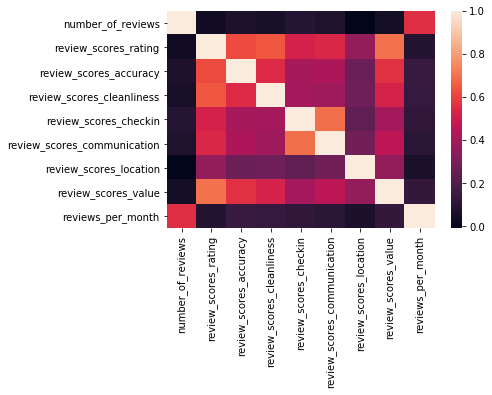

In [35]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Create new review table below

In [36]:
reviewtable= pd.concat([sreview,dummy_cols_df],axis=1)
reviewtable

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,beds,...,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,1.0,...,True,False,False,True,0,0,0,0,1,0
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,1.0,...,True,False,False,True,0,0,0,0,1,0
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,7.0,...,True,False,False,True,0,0,0,0,1,0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,True,False,False,True,0,0,0,0,1,0
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,3.0,...,False,False,False,True,0,0,0,0,1,0
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.45,1.0,...,False,False,False,True,0,0,0,0,1,0
6,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.46,1.0,...,False,False,False,True,0,0,0,0,1,0
7,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.73,1.0,...,False,False,False,True,0,0,0,0,1,0
8,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1.22,1.0,...,True,False,False,True,0,0,0,0,1,0
9,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55,1.0,...,True,False,False,True,0,0,0,0,1,0


Check the null data

In [37]:
reviewtable.isnull().sum( )

number_of_reviews                0
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
beds                             0
24-Hour Check-in                 0
Air Conditioning                 0
Breakfast                        0
Buzzer/Wireless Intercom         0
Cable TV                         0
Carbon Monoxide Detector         0
Cat(s)                           0
Dog(s)                           0
Doorman                          0
Dryer                            0
Elevator in Building             0
Essentials                       0
Family/Kid Friendly              0
Fire Extinguisher                0
First Aid Kit                    0
Free Parking on Premises         0
Gym                              0
Hair Dryer                       0
Hangers             

Drop the null rows

In [38]:
droped_reviewtable=reviewtable.dropna()
droped_reviewtable

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,beds,...,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,1.0,...,True,False,False,True,0,0,0,0,1,0
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,1.0,...,True,False,False,True,0,0,0,0,1,0
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,7.0,...,True,False,False,True,0,0,0,0,1,0
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,3.0,...,False,False,False,True,0,0,0,0,1,0
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.45,1.0,...,False,False,False,True,0,0,0,0,1,0
6,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.46,1.0,...,False,False,False,True,0,0,0,0,1,0
7,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,4.73,1.0,...,False,False,False,True,0,0,0,0,1,0
8,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1.22,1.0,...,True,False,False,True,0,0,0,0,1,0
9,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55,1.0,...,True,False,False,True,0,0,0,0,1,0
10,181,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3.33,1.0,...,True,False,False,True,0,0,0,0,1,0


In [40]:
droped_reviewtable.drop(['review_scores_rating'],axis=1)
#droped_revwiewtable['review_scores_rating'].astype(np.float)

,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,beds,24-Hour Check-in,...,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan
0,207,10.0,10.0,10.0,10.0,9.0,10.0,4.07,1.0,False,...,True,False,False,True,0,0,0,0,1,0
1,43,10.0,10.0,10.0,10.0,10.0,10.0,1.48,1.0,False,...,True,False,False,True,0,0,0,0,1,0
2,20,10.0,10.0,10.0,10.0,10.0,10.0,1.15,7.0,False,...,True,False,False,True,0,0,0,0,1,0
4,38,9.0,9.0,10.0,10.0,9.0,9.0,0.89,3.0,False,...,False,False,False,True,0,0,0,0,1,0
5,17,10.0,10.0,10.0,10.0,10.0,10.0,2.45,1.0,False,...,False,False,False,True,0,0,0,0,1,0
6,58,10.0,10.0,10.0,10.0,10.0,10.0,2.46,1.0,False,...,False,False,False,True,0,0,0,0,1,0
7,173,10.0,10.0,10.0,10.0,9.0,10.0,4.73,1.0,False,...,False,False,False,True,0,0,0,0,1,0
8,8,10.0,9.0,10.0,9.0,10.0,10.0,1.22,1.0,False,...,True,False,False,True,0,0,0,0,1,0
9,32,10.0,10.0,10.0,10.0,10.0,9.0,1.55,1.0,False,...,True,False,False,True,0,0,0,0,1,0
10,181,10.0,10.0,10.0,10.0,10.0,10.0,3.33,1.0,True,...,True,False,False,True,0,0,0,0,1,0


Training the data

In [41]:
X_r = droped_reviewtable.drop(['review_scores_rating'],axis=1)
#X = features[cat_amenities]
y_r = droped_reviewtable['review_scores_rating']

#Split into train and test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = .30, random_state=99) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train_r, y_train_r) #Fit
        
#Predict and score the model
y_test_preds_r = lm_model.predict(X_test_r) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test_r, y_test_preds_r), len(y_test_r))

'The r-squared score for the model using only quantitative variables was 0.613094390033003 on 948 values.'

In [42]:
y_test_preds_r = lm_model.predict(X_test_r)
y_train_preds_r = lm_model.predict(X_train_r)

    #Score using your model
test_score_r = r2_score(y_test_r, y_test_preds_r)
train_score_r = r2_score(y_train_r, y_train_preds_r)
test_RMSE_r = np.sqrt(mean_squared_error(y_test_r,y_test_preds_r))
train_RMSE_r = np.sqrt(mean_squared_error(y_train_r, y_train_preds_r))
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score_r, test_score_r))
print("The RMSE on the training data was {}.  The RMSE on the test data was {}.".format(train_RMSE_r, test_RMSE_r))

The rsquared on the training data was 0.6829324640432286.  The rsquared on the test data was 0.613094390033003.
The RMSE on the training data was 3.722438922298458.  The RMSE on the test data was 4.081241191596902.


In [43]:
def coef_weights_r(coefficients_r, X_train_r):

    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df_r = pd.DataFrame()
    coefs_df_r['est_int'] = X_train_r.columns
    coefs_df_r['coefs'] = lm_model.coef_
    coefs_df_r['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df_r = coefs_df_r.sort_values('coefs', ascending=False)
    return coefs_df_r

#Use the function
coef_df_r = coef_weights_r(lm_model.coef_, X_train_r)

#A quick look at the top results
coef_df_r.head(20)

,est_int,coefs,abs_coefs
6,review_scores_value,3.014476,3.014476
2,review_scores_cleanliness,1.881519,1.881519
1,review_scores_accuracy,1.789638,1.789638
4,review_scores_communication,1.668483,1.668483
3,review_scores_checkin,1.373315,1.373315
31,Internet,0.945343,0.945343
36,Other pet(s),0.885875,0.885875
44,Suitable for Events,0.762715,0.762715
5,review_scores_location,0.645468,0.645468
28,Heating,0.611958,0.611958


Conclusion:
In this project, we proposed three questions.
1. Compare the list price on Boston and seattle.
2. Modeling and predict the listing price.
3. Customer review modeling.



For the question one,Boston have a higher average price than seattle.Price for Boston have the smooth distribution between 50 to 200 and the price for seattle have the sharp distribution at 100 dollar.The total volume of Seattle is 488613.0 dollar and Boston is 623524.0.We can see Boston have larger value of market and guest will spend more money in the Boston because the higher average price


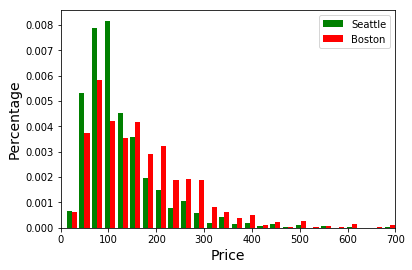









Question two is a very interested problem which is price modeling.We are trying to develop a model to predict price.We used total 48 features include all amenities, bed_types, and etc. The model we used is LinearRegression from sklearn. After the training, the R squared on the training data is 0.39 and on the test data is 0.41, RMSE on the training data is 69.46 and on the test data is 70.81. 

We also did the coefficient weight analysis. We found the most important featrues effected on listing price is real bed,futon and airbed. Most of the guests want to have the extra bed, so we suggest the landlord  should prepare the Real bed,couch, pull out sofa and futon in their house. Their property will become popluar if they can follow this rule which is invest money on bed, futon and airbed.We also suggest landlord put more pictures about their high quality bed.

Question three is customer review modeling. We use the same method as question two but different features.The rsquared on the training data was 0.68.  The rsquared on the test data was 0.61.The RMSE on the training data was 3.72.  The RMSE on the test data was 4.08.From the coefficient weight analysis, We found the internet, pets, Suitable for Events are the important features for get the good customer review.We suggest the landlord should keep these in mind if they want to get good reviews.